In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import joblib
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




## 1. DATA PREPROCESSING

In [3]:
data = pd.read_csv('heart_disease.csv') # loading the data
data.head() # first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail() # last 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.shape # no. of rows and columns

(1025, 14)

In [6]:
# getting informationa About the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe() # An approchable measure for the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1 REPRESENTS DEFECTIVE HEART

0 REPRESENTS HEALTHY HEART

## 2. SPLITTING THE FEATURES AND THE TARGET

In [10]:
X = data.drop(columns= 'target', axis=1)
Y = data['target']

In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


## 3.SPLITTING THE DATA INTO TRAINING AND TEST DATA

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify= Y, random_state=2)

In [14]:
print(X.shape,X_test.shape, X_train.shape)

(1025, 13) (205, 13) (820, 13)


## 4.TRAINING THE MODEL

NAIVE BAYES THEOREM

Naive Bayes Accuracy: 78.05%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       100
           1       0.77      0.81      0.79       105

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205

Confusion Matrix for Naive Bayes:
[[75 25]
 [20 85]]


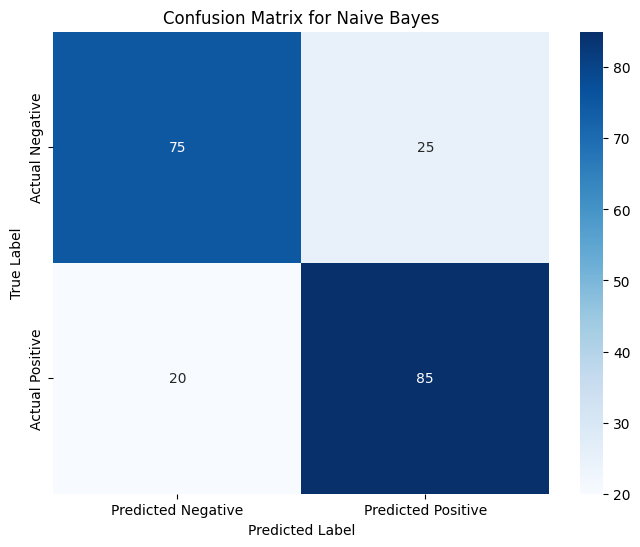

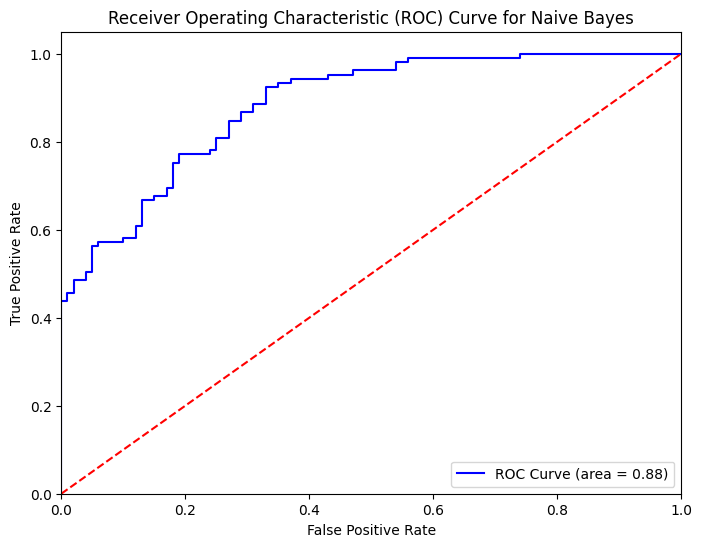

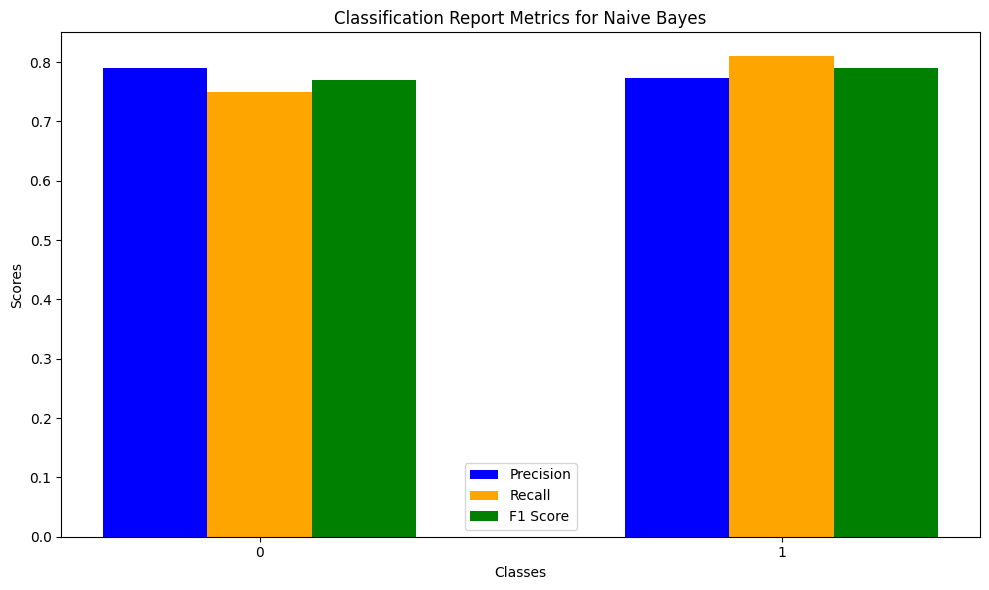

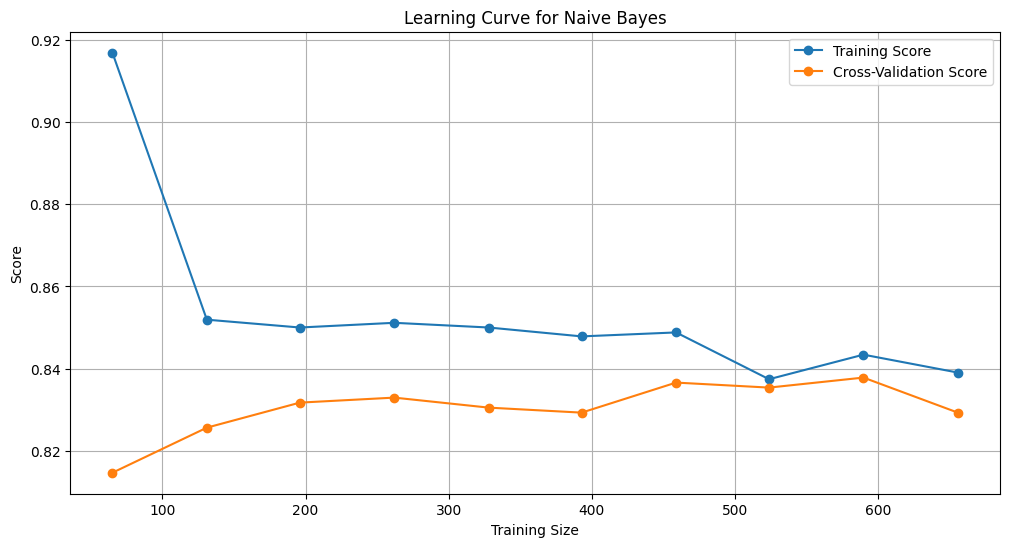

['nb_model.pkl']

In [15]:


# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_nb = nb_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Detailed classification report
report_nb = classification_report(Y_test, Y_pred_nb, output_dict=True)
print("Classification Report for Naive Bayes:")
print(classification_report(Y_test, Y_pred_nb))

# Confusion matrix
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix_nb)

# 1. Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Plotting the ROC Curve
Y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, Y_prob_nb)
roc_auc_nb = roc_auc_score(Y_test, Y_prob_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', label=f'ROC Curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# 3. Bar Chart for Classification Report Metrics
# Convert keys to a list for indexing
labels_nb = list(report_nb.keys())

# Prepare data for bar plot
precision_values_nb = [report_nb[label]['precision'] for label in labels_nb[:-3]]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
recall_values_nb = [report_nb[label]['recall'] for label in labels_nb[:-3]]
f1_values_nb = [report_nb[label]['f1-score'] for label in labels_nb[:-3]]

# Prepare x locations for bars
x_nb = range(len(labels_nb) - 3)  # Exclude the last three labels

plt.figure(figsize=(10, 6))
plt.bar(x_nb, precision_values_nb, width=0.2, label='Precision', color='blue', align='center')
plt.bar([p + 0.2 for p in x_nb], recall_values_nb, width=0.2, label='Recall', color='orange', align='center')
plt.bar([p + 0.4 for p in x_nb], f1_values_nb, width=0.2, label='F1 Score', color='green', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics for Naive Bayes')
plt.xticks([p + 0.2 for p in x_nb], labels_nb[:-3], rotation=0)  # Centered labels
plt.legend()
plt.tight_layout()
plt.show()

# 4. Plotting the Learning Curve for Naive Bayes
train_sizes, train_scores, test_scores = learning_curve(nb_model, X_train, Y_train, 
                                                          train_sizes=np.linspace(0.1, 1.0, 10),
                                                          cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', marker='o')

plt.title('Learning Curve for Naive Bayes')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

joblib.dump(nb_model, 'nb_model.pkl')

RANDOM FOREST CLASSIFIER

Random Forest Accuracy: 100.00%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix for Random Forest:
[[100   0]
 [  0 105]]


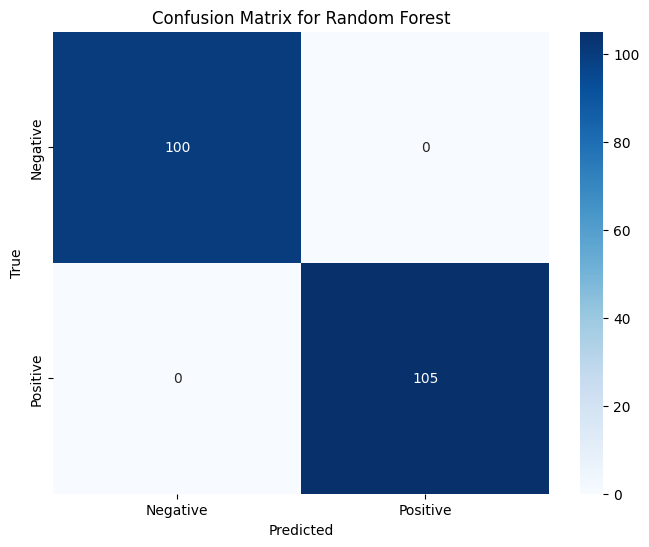

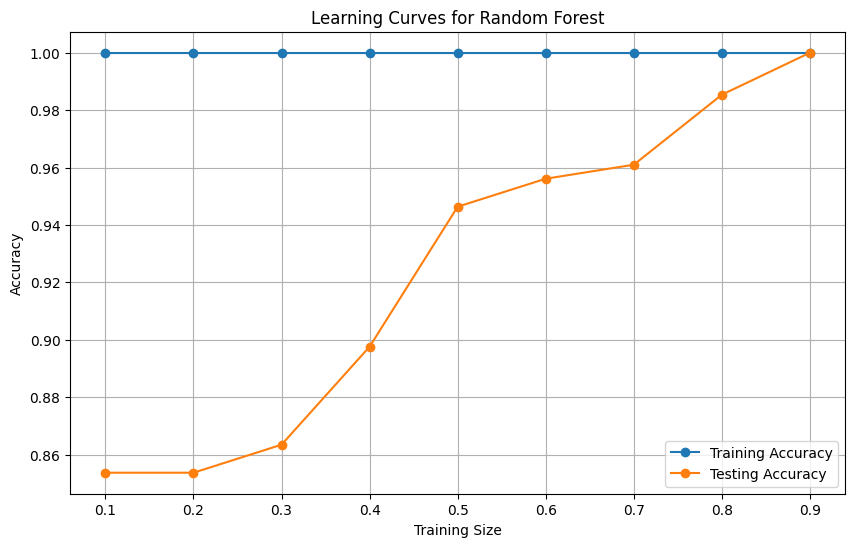

C:\Users\addys\AppData\Local\Temp\ipykernel_27724\1736858494.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette='viridis')


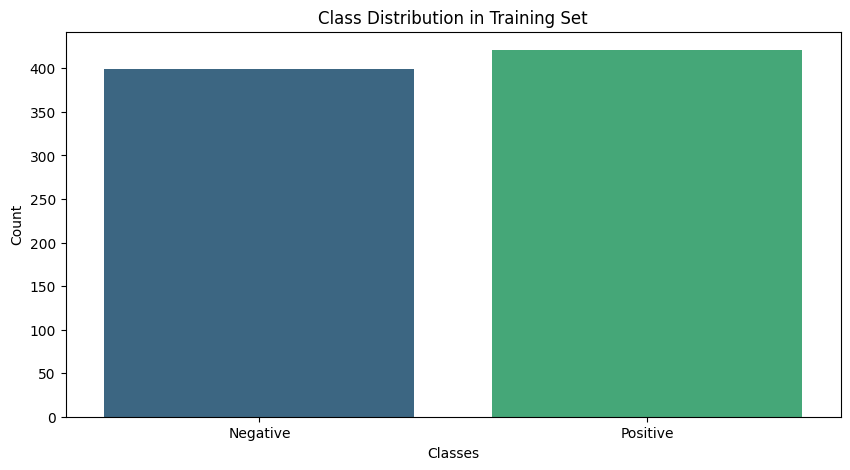

C:\Users\addys\AppData\Local\Temp\ipykernel_27724\1736858494.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_test, palette='viridis')


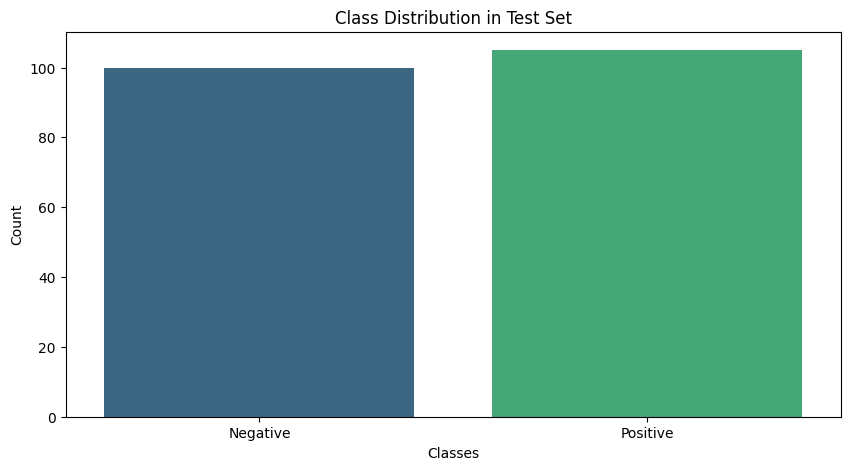

['rf_model_tuned.pkl']

In [16]:


# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using Grid Search
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, Y_train)
best_rf_model = rf_grid.best_estimator_

# Make predictions on the test data
Y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Detailed classification report
print("Classification Report for Random Forest:")
print(classification_report(Y_test, Y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest:")
conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
print(conf_matrix)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting Learning Curves
train_sizes = np.linspace(0.1, 0.9, 9)  # Values between 0.1 and 0.9
train_scores = []
test_scores = []

for train_size in train_sizes:
    # Ensuring train_size is interpreted correctly
    X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    rf_model.fit(X_train_subset, Y_train_subset)
    train_scores.append(rf_model.score(X_train_subset, Y_train_subset))
    test_scores.append(rf_model.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_scores, label='Testing Accuracy', marker='o')
plt.title('Learning Curves for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Visualizing Class Balance in Training Set
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

# Visualizing Class Balance in Test Set
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_test, palette='viridis')
plt.title('Class Distribution in Test Set')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

# Save the tuned Random Forest model
joblib.dump(best_rf_model, 'rf_model_tuned.pkl')


FEATURE SCALING (FOR LOGISTIC REGRESSION, SVM, GRADIENT BOOSTING)

In [17]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


LOGISTIC REGRESSION

Accuracy: 80.49%
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.77      0.88      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Confusion Matrix:
 [[73 27]
 [13 92]]


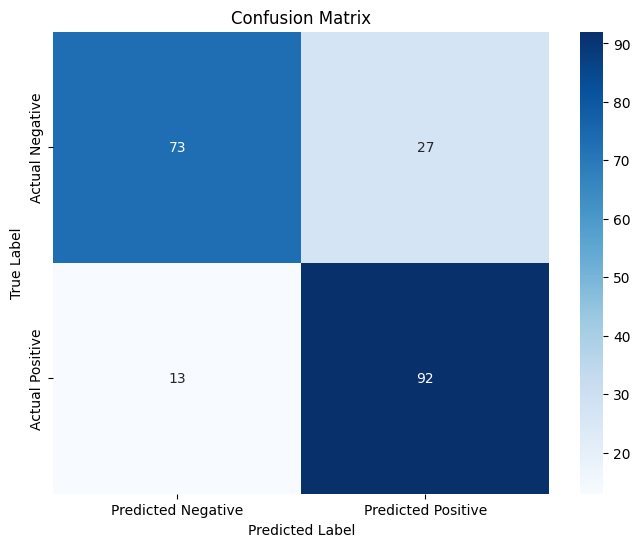

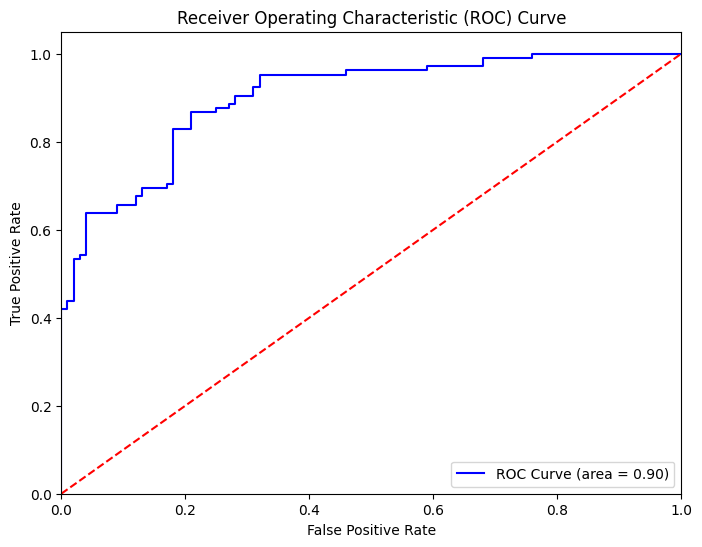

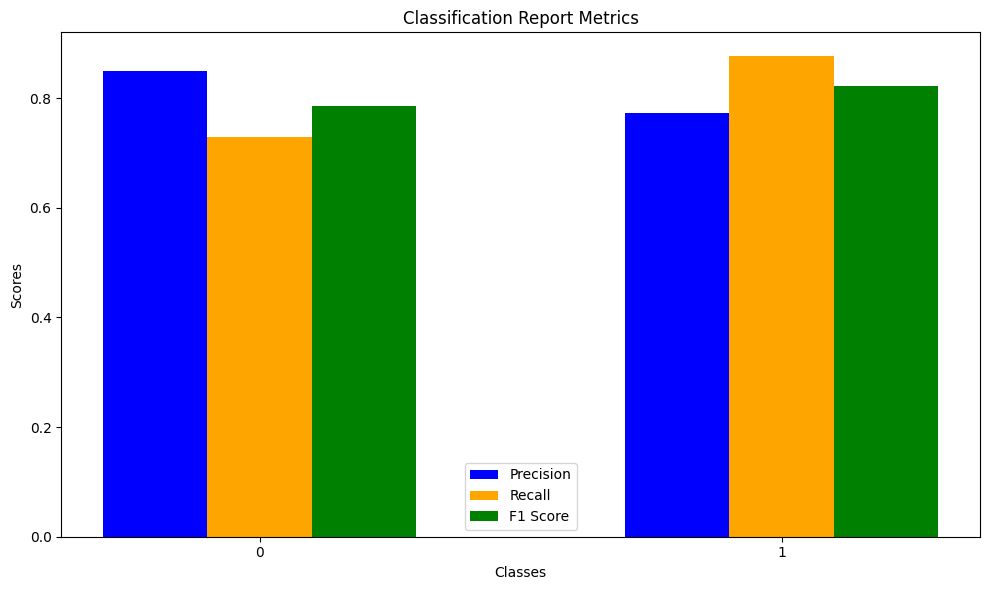

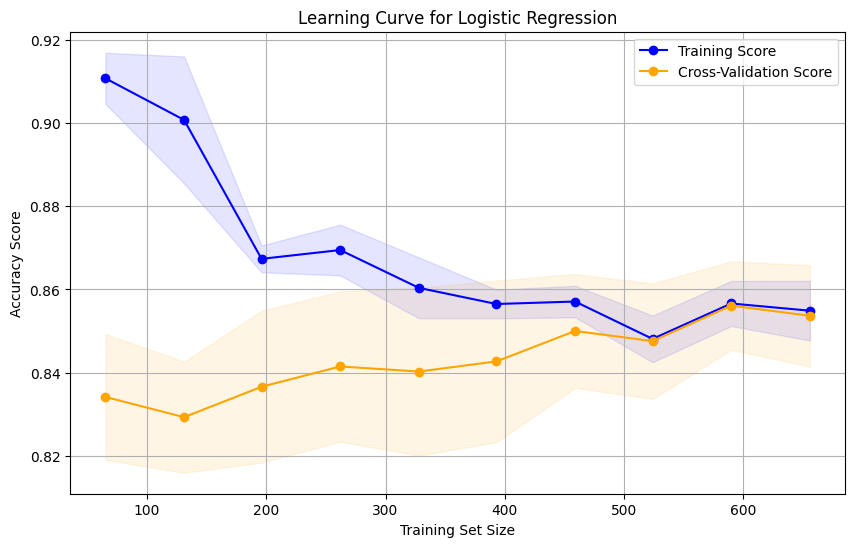

['logreg.pkl']

In [18]:

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logreg.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
report = classification_report(Y_test, Y_pred, output_dict=True)
print(classification_report(Y_test, Y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 1. Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Plotting the ROC Curve
Y_prob = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Bar Chart for Classification Report Metrics
# Convert keys to a list for indexing
labels = list(report.keys())

# Prepare data for bar plot
precision_values = [report[label]['precision'] for label in labels[:-3]]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
recall_values = [report[label]['recall'] for label in labels[:-3]]
f1_values = [report[label]['f1-score'] for label in labels[:-3]]

# Prepare x locations for bars
x = range(len(labels) - 3)  # Exclude the last three labels

plt.figure(figsize=(10, 6))
plt.bar(x, precision_values, width=0.2, label='Precision', color='blue', align='center')
plt.bar([p + 0.2 for p in x], recall_values, width=0.2, label='Recall', color='orange', align='center')
plt.bar([p + 0.4 for p in x], f1_values, width=0.2, label='F1 Score', color='green', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks([p + 0.2 for p in x], labels[:-3], rotation=0)  # Centered labels
plt.legend()
plt.tight_layout()
plt.show()

# 4. Learning Curve for Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X_train, Y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-Validation Score')

# Plot the std deviation as a shaded area
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 color='blue', alpha=0.1)
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 color='orange', alpha=0.1)

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()


joblib.dump(logreg,'logreg.pkl')

SUPPORT VECTOR MACHINES (SVM)

SVM Accuracy: 81.95%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       100
           1       0.77      0.92      0.84       105

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205

Confusion Matrix for SVM:
[[71 29]
 [ 8 97]]


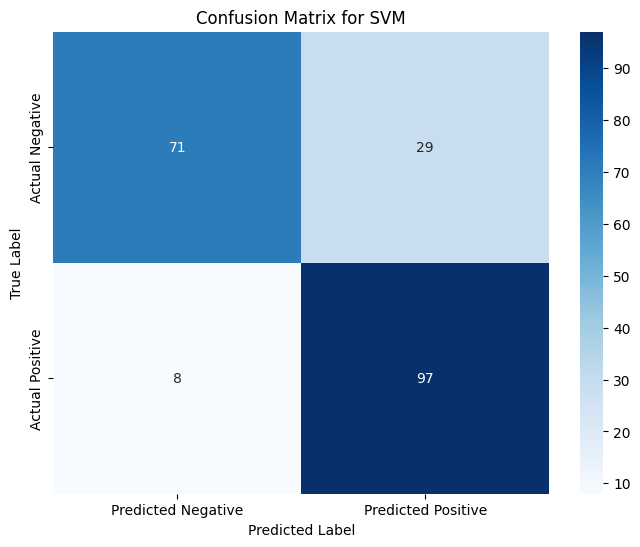

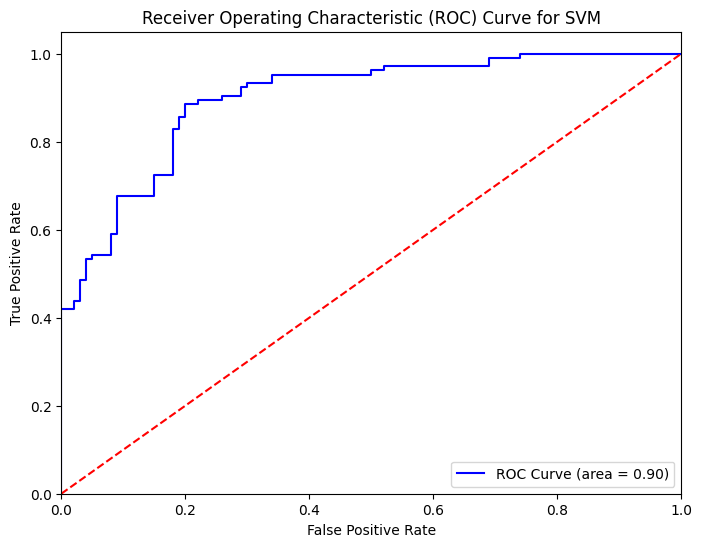

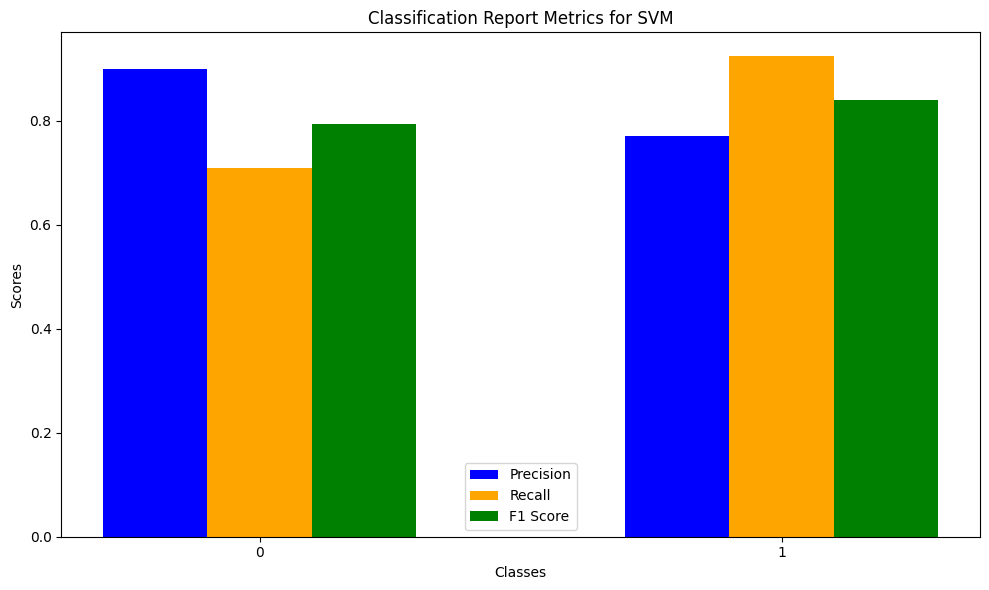

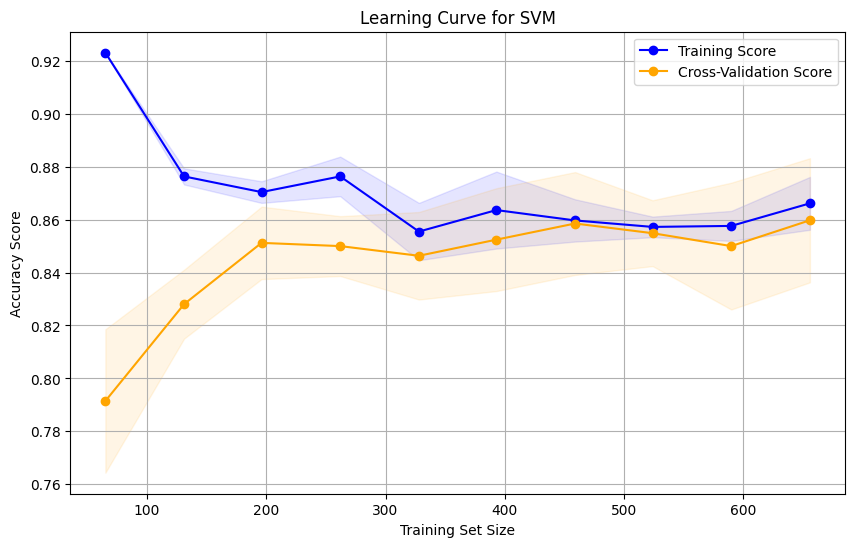

['svm_model.pkl']

In [19]:


# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True)  # Set probability=True for ROC curve

# Fit the model on the training data
svm_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_svm = svm_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Detailed classification report
report_svm = classification_report(Y_test, Y_pred_svm, output_dict=True)
print("Classification Report for SVM:")
print(classification_report(Y_test, Y_pred_svm))

# Confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

# 1. Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Plotting the ROC Curve
Y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, Y_prob_svm)
roc_auc_svm = roc_auc_score(Y_test, Y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()

# 3. Bar Chart for Classification Report Metrics
# Convert keys to a list for indexing
labels_svm = list(report_svm.keys())

# Prepare data for bar plot
precision_values_svm = [report_svm[label]['precision'] for label in labels_svm[:-3]]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
recall_values_svm = [report_svm[label]['recall'] for label in labels_svm[:-3]]
f1_values_svm = [report_svm[label]['f1-score'] for label in labels_svm[:-3]]

# Prepare x locations for bars
x_svm = range(len(labels_svm) - 3)  # Exclude the last three labels

plt.figure(figsize=(10, 6))
plt.bar(x_svm, precision_values_svm, width=0.2, label='Precision', color='blue', align='center')
plt.bar([p + 0.2 for p in x_svm], recall_values_svm, width=0.2, label='Recall', color='orange', align='center')
plt.bar([p + 0.4 for p in x_svm], f1_values_svm, width=0.2, label='F1 Score', color='green', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics for SVM')
plt.xticks([p + 0.2 for p in x_svm], labels_svm[:-3], rotation=0)  # Centered labels
plt.legend()
plt.tight_layout()
plt.show()

# 4. Learning Curve for SVM
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, Y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-Validation Score')

# Plot the std deviation as a shaded area
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 color='blue', alpha=0.1)
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 color='orange', alpha=0.1)

plt.title('Learning Curve for SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()


joblib.dump(svm_model, 'svm_model.pkl')

GRADIENT BOOSTING

Class distribution in training data: [399 421]
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score (F1): 0.9798663176083788
Gradient Boosting Accuracy: 100.00%
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix for Gradient Boosting:
[[100   0]
 [  0 105]]


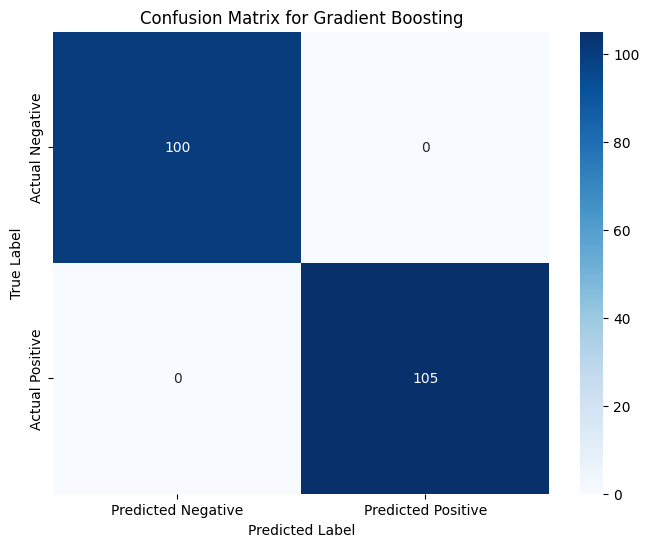

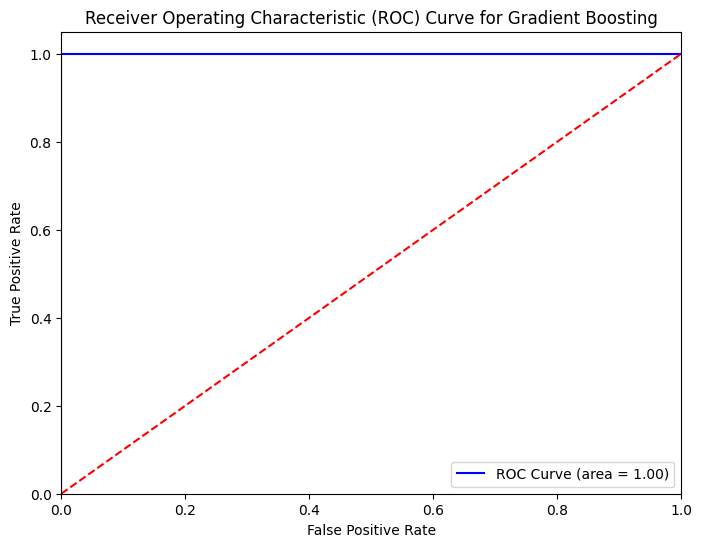

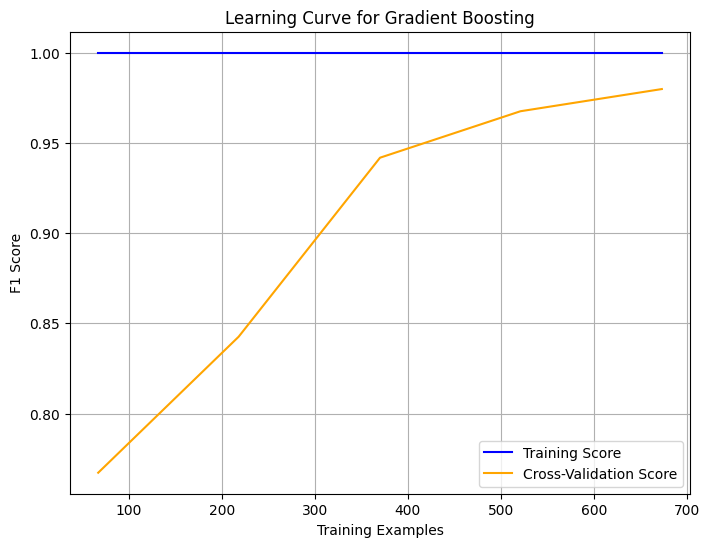

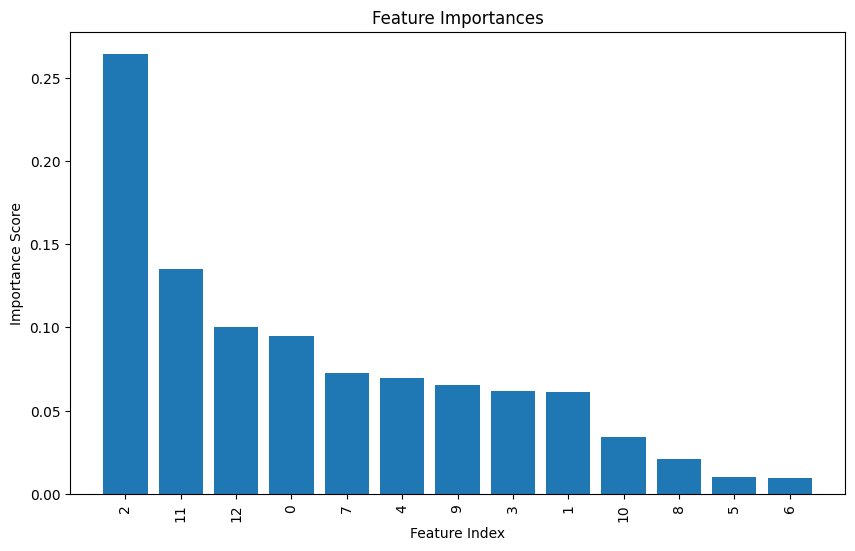

['gb_model.pkl']

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

# Check for class imbalance in the training data
print("Class distribution in training data:", np.bincount(Y_train))

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the balanced training data
grid_search.fit(X_train_balanced, Y_train_balanced)

# Get the best parameters and score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score (F1):", best_score)

# Initialize the best model
gb_model_best = grid_search.best_estimator_

# Fit the best model on the balanced training data
gb_model_best.fit(X_train_balanced, Y_train_balanced)

# Make predictions on the test data
Y_pred_gb = gb_model_best.predict(X_test)

# Evaluate the accuracy of the model
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")

# Detailed classification report
print("Classification Report for Gradient Boosting:")
print(classification_report(Y_test, Y_pred_gb))

# Confusion matrix
conf_matrix_gb = confusion_matrix(Y_test, Y_pred_gb)
print("Confusion Matrix for Gradient Boosting:")
print(conf_matrix_gb)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting the ROC Curve
Y_prob_gb = gb_model_best.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, Y_prob_gb)
roc_auc_gb = roc_auc_score(Y_test, Y_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', label=f'ROC Curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

# Learning Curve for Gradient Boosting
train_sizes, train_scores, test_scores = learning_curve(gb_model_best, X_train_balanced, Y_train_balanced, cv=5, scoring='f1', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
plt.title('Learning Curve for Gradient Boosting')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot Feature Importances
feature_importances = gb_model_best.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

# Save the best model
joblib.dump(gb_model_best, 'gb_model.pkl')



K-MEANS


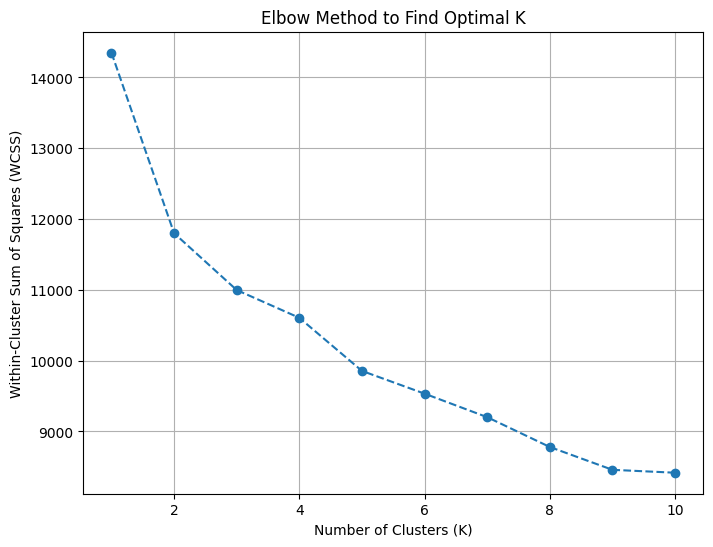

Silhouette Score for 3 clusters: 0.13


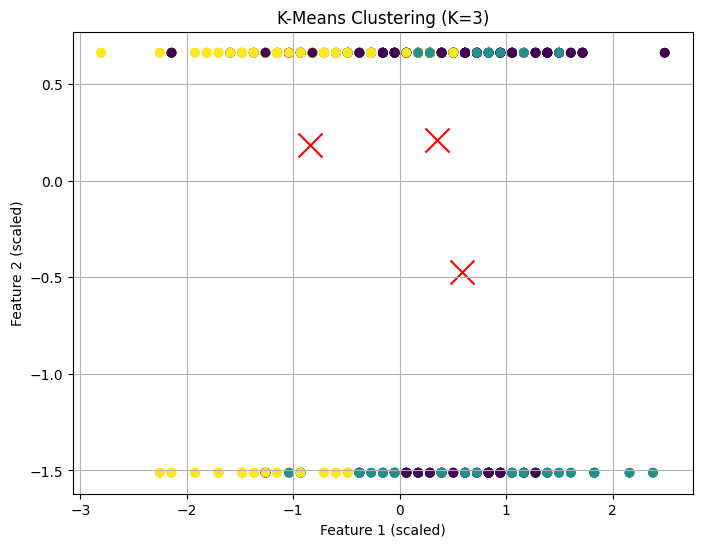

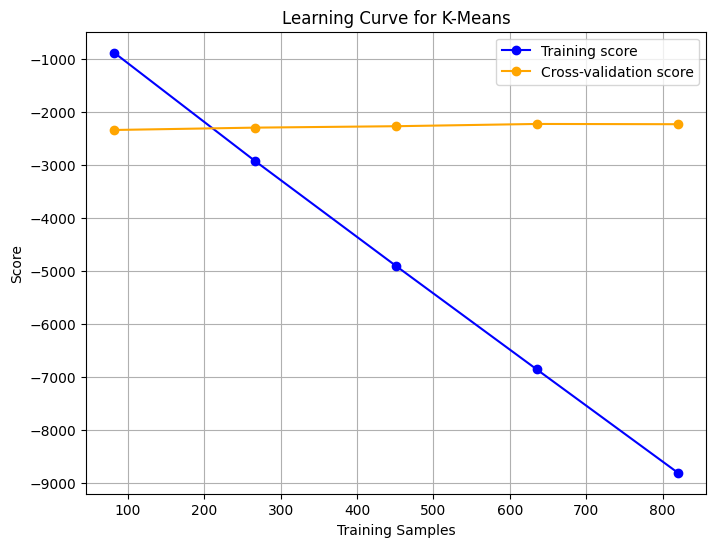

In [21]:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(data)

# Define the range for number of clusters (K) to test the Elbow Method
wcss = []  # To store within-cluster sum of squares

# Perform K-Means clustering for each number of clusters in range 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Method graph to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

#  select the optimal number of clusters as 3 (based on the elbow) (assumption)
optimal_clusters = 3

# Initialize KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)

# Fit KMeans to the data
kmeans.fit(X_scaled)

# Get cluster labels for each data point
clusters = kmeans.labels_

# Calculating Silhouette Score to evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}')

# Add the cluster labels to the original dataset (for visualization)
data['Cluster'] = clusters

# Visualize the Clusters (assuming we can visualize using the first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title(f'K-Means Clustering (K={optimal_clusters})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid()
plt.show()

# Visualizing the learning curve (Elbow Method)
train_sizes, train_scores, test_scores = learning_curve(kmeans, X_scaled, clusters, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label="Cross-validation score")
plt.title('Learning Curve for K-Means')
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()



## 4.MODEL EVALUATION

In [22]:
# Function to calculate and print metrics for each model
def print_final_results(model_name, Y_test, Y_pred):
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Print the results in a clean format
    print(f"{model_name}:")
    print("-" * 21)
    print(f"Accuracy:      {accuracy * 100:.2f}%")
    print(f"Precision:     {precision:.2f}")
    print(f"Recall:        {recall:.2f}")
    print(f"F1-Score:      {f1:.2f}\n")


# Logistic Regression
print_final_results("Logistic Regression", Y_test, Y_pred)

# Naive Bayes
print_final_results("Naive Bayes", Y_test, Y_pred_nb)

# SVM
print_final_results("SVM", Y_test, Y_pred_svm)

# Random Forest
print_final_results("Random Forest", Y_test, Y_pred_rf)

# Gradient Boosting
print_final_results("Gradient Boosting", Y_test, Y_pred_gb)


Logistic Regression:
---------------------
Accuracy:      80.49%
Precision:     0.77
Recall:        0.88
F1-Score:      0.82

Naive Bayes:
---------------------
Accuracy:      78.05%
Precision:     0.77
Recall:        0.81
F1-Score:      0.79

SVM:
---------------------
Accuracy:      81.95%
Precision:     0.77
Recall:        0.92
F1-Score:      0.84

Random Forest:
---------------------
Accuracy:      100.00%
Precision:     1.00
Recall:        1.00
F1-Score:      1.00

Gradient Boosting:
---------------------
Accuracy:      100.00%
Precision:     1.00
Recall:        1.00
F1-Score:      1.00



## 5. BUILDING A PREDICTIVE SYSTEM

In [23]:
# Define input data as a tuple
input_data = (47,1,0,112,204,0,1,143,0,0.1,2,0,2)

# Convert the input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array to match the model's input shape (1, -1) means 1 row and as many columns as needed
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction using the Random Forest model
indication = best_rf_model.predict(input_data_reshaped)

# Print the prediction result
print(indication)
if (indication[0]==0):
    print("It's very unlikely that you have a Heart Disease")
else:
    print("You should consult a doctor, you may have a Heart Disease")

[1]
You should consult a doctor, you may have a Heart Disease


c:\ML PROJECT\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 6.SAVING THE TRAINED MODEL AND DEPLOYING

In [24]:


import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load the Random Forest model
best_rf_model = joblib.load('rf_model_tuned.pkl')  # Replace with your actual model filename

# Create a title for the app
st.title("Heart Disease Indication Model")

# Create input fields for user inputs
age = st.number_input("Age", min_value=0, max_value=120, value=30)
sex = st.selectbox("Sex", options=[("Female", 0), ("Male", 1)])  # Store values directly as integers
cp = st.selectbox("Chest Pain Type", options=[("Typical Angina", 0), ("Atypical Angina", 1), 
                                              ("Non-Anginal Pain", 2), ("Asymptomatic", 3)])  # Store values directly as integers
trestbps = st.number_input("Resting Blood Pressure (mm Hg)", min_value=0, value=120)
chol = st.number_input("Cholesterol (mg/dl)", min_value=0, value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", options=[("No", 0), ("Yes", 1)])
restecg = st.selectbox("Resting Electrocardiographic Results", options=[("Normal", 0), 
                                                                        ("Abnormal", 1), 
                                                                        ("Probable or definite left ventricular hypertrophy", 2)])
thalach = st.number_input("Maximum Heart Rate Achieved", min_value=0, value=150)
exang = st.selectbox("Exercise Induced Angina", options=[("No", 0), ("Yes", 1)])
oldpeak = st.number_input("Oldpeak", value=1.0)
slope = st.selectbox("Slope of the Peak Exercise ST Segment", options=[("Upsloping", 0), ("Flat", 1), ("Downsloping", 2)])
ca = st.selectbox("Number of Major Vessels (0-3)", options=[0, 1, 2, 3])
thal = st.selectbox("Thalassemia", options=[("Normal", 0), ("Fixed Defect", 1), ("Reversible Defect", 2), ("Unknown", 3)])

# Create a button to make the prediction
if st.button("Predict"):
    # Use the directly selected values
    sex = sex[1]
    cp = cp[1]
    fbs = fbs[1]
    restecg = restecg[1]
    exang = exang[1]
    slope = slope[1]
    thal = thal[1]

    # Preparing the input data as a numpy array
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    #Random Forest model
    prediction = best_rf_model.predict(input_data)

    #  output data for display
    result_df = pd.DataFrame({
        "Input Feature": [
            "Age", "Sex (0 = Female, 1 = Male)", "Chest Pain Type (0-3)", "Resting BP (mm Hg)", 
            "Cholesterol (mg/dl)", "Fasting Blood Sugar (0 = No, 1 = Yes)", 
            "Resting ECG Results (0-2)", "Max Heart Rate", "Exercise Induced Angina (0 = No, 1 = Yes)", 
            "Oldpeak", "Slope (0-2)", "No. of Major Vessels (0-3)", "Thalassemia (0-3)"
        ],
        "Your Input": [
            age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
        ],
        "Normal Range": [
            "18-120", "0-1", "0-3", "<120", "<200", "0 or 1", "0-2", ">=70", "0 or 1", "<5", "0-2", "0-3", "0-3"
        ]
    })

    #  prediction result
    st.subheader("Prediction Result")
    if prediction[0] == 1:
        st.success("The patient is likely to have heart disease.")
    else:
        st.success("The patient is unlikely to have heart disease.")

    #  user inputs and normal values
    st.subheader("Your Inputs vs Normal Values")
    st.write(result_df)

    #  download results as CSV
    csv = result_df.to_csv(index=False)
    st.download_button("Download Results as CSV", csv, "results.csv")





2024-10-24 17:14:41.270 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-10-24 17:14:41.903 
  command:

    streamlit run C:\Users\addys\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-24 17:14:41.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 17:14:41.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 17:14:41.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 17:14:41.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 17:14:41.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 17:14:41.911 Session state does not function when running a script without `streamlit run`
2024-10-24 17:14:41.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in ba